### Test of the gromacs table maker

In [1]:
import sys
sys.path.insert(0, "..")

In [2]:
print sys.path

['..', '', 'C:\\Users\\rbj428\\AppData\\Local\\Continuum\\Anaconda2_3\\python27.zip', 'C:\\Users\\rbj428\\AppData\\Local\\Continuum\\Anaconda2_3\\DLLs', 'C:\\Users\\rbj428\\AppData\\Local\\Continuum\\Anaconda2_3\\lib', 'C:\\Users\\rbj428\\AppData\\Local\\Continuum\\Anaconda2_3\\lib\\plat-win', 'C:\\Users\\rbj428\\AppData\\Local\\Continuum\\Anaconda2_3\\lib\\lib-tk', 'C:\\Users\\rbj428\\AppData\\Local\\Continuum\\Anaconda2_3', 'C:\\Users\\rbj428\\AppData\\Local\\Continuum\\Anaconda2_3\\lib\\site-packages', 'C:\\Users\\rbj428\\AppData\\Local\\Continuum\\Anaconda2_3\\lib\\site-packages\\Sphinx-1.5.1-py2.7.egg', 'C:\\Users\\rbj428\\AppData\\Local\\Continuum\\Anaconda2_3\\lib\\site-packages\\win32', 'C:\\Users\\rbj428\\AppData\\Local\\Continuum\\Anaconda2_3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\rbj428\\AppData\\Local\\Continuum\\Anaconda2_3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\rbj428\\AppData\\Local\\Continuum\\Anaconda2_3\\lib\\site-packages\\sputnik-0.9.3-py2.7.egg', 'C:\\

**Make the potential**

In [3]:
from potentials import potential_combiner

In [4]:
potential_specs = {'wca': 'weeks_chandler_anderson',
                   'dep': 'depletion',
                   'elec': 'electrostatic_dlvo'}

In [5]:
potential = potential_combiner.Potential(potential_specs)

In [6]:
params_val = {'wca__d': True, 'wca__epsilon': True, 'wca__alpha': False, 'wca__max_ur': False, 
              'dep__rho_p': True, 'dep__d_p': True, 'dep__d': False, 'dep__w': False, 
              'elec__A': True, 'elec__z': True}

In [7]:
potential.SetParamsState(params_val)

**Create the table maker**

In [8]:
from gromacs_interface_tools import gromacs_potential_maker

In [9]:
gromacs_potential_maker = gromacs_potential_maker.SimulationPotentialConverter()

In [10]:
params_val = {'wca__d': 1.0, 'wca__epsilon': 1.0, 'wca__alpha': 6.0, 'wca__max_ur': float(1e6), 
              'dep__rho_p': 6.0, 'dep__d_p': 0.6, 'dep__d': 1.0, 'dep__w': 50.0, 
              'elec__A': 1.0, 'elec__z': 2.0}

In [11]:
gromacs_potential_maker.LoadPotential(potential, params_val)

In [12]:
gromacs_potential_maker.TabulatePotential(r_table_max=15.0, dr=0.01)

In [13]:
gromacs_potential_maker.CutShiftTabulated(e_max=0.1, f_max=0.01, r_max=8.0, shift=False)

In [14]:
gromacs_potential_maker.MakeTable(filename='./example_table.xvg')

In [15]:
gromacs_potential_maker.InsertGromppCutoff(filename='./example_grompp.mdp')

In [22]:
potential_specs = {'wca': 'weeks_chandler_anderson',
                   'dep': 'depletion',
                   'elec': 'electrostatic_dlvo'}

with open('potential_specs.json', 'w') as outfile:  
    json.dump(potential_specs, outfile, indent=4)

In [23]:
params_state = {'wca__d': [], 'wca__epsilon': [0.5, 200.0], 'wca__alpha': [], 'wca__max_ur': [], 
              'dep__rho_p': [0.0, 6.0], 'dep__d_p': [0.0, 2.0], 'dep__d': [], 'dep__w': [], 
              'elec__A': [0.0, 100.0], 'elec__z': [0.0, 10.0]}

with open('params_state.json', 'w') as outfile:  
    json.dump(params_state, outfile, indent=4)

In [24]:
params_val = {'wca__d': 1.0, 'wca__epsilon': 1.0, 'wca__alpha': 6.0, 'wca__max_ur': float(1e6), 
              'dep__rho_p': 6.0, 'dep__d_p': 0.6, 'dep__d': 1.0, 'dep__w': 50.0, 
              'elec__A': 1.0, 'elec__z': 2.0}

with open('params_val.json', 'w') as outfile:  
    json.dump(params_val, outfile, indent=4)

In [28]:
potential_specs_and_state = (
{'specs': {'wca': 'weeks_chandler_anderson',
           'dep': 'depletion',
           'elec': 'electrostatic_dlvo'},
'state': {'wca__d': {'opt': False}, 
          'wca__epsilon': {'opt': True, 'min': 0.2}, 
          'wca__alpha': {'opt': False}, 
          'wca__max_ur': {'opt': False}, 
          'dep__rho_p': {'opt': True, 'min': 0.0, 'max': 6.0}, 
          'dep__d_p': {'opt': True, 'min': 0.0, 'max': 1.0}, 
          'dep__d': {'opt': False}, 
          'dep__w': {'opt': False}, 
          'elec__A': {'opt': True, 'min': 0.0},
          'elec__z': {'opt': True, 'min': 0.0, 'max': 6.0}}
}
)
with open('potential_specs_and_state.json', 'w') as outfile:  
    json.dump(potential_specs_and_state, outfile, indent=4)

In [2]:
from numpy import arange

In [6]:
arange(0.0, 5.0 + 0.01, 0.01)

array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
        0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
        0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
        0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
        0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,
        0.45,  0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,
        0.54,  0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,
        0.63,  0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,
        0.72,  0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,
        0.81,  0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,
        0.9 ,  0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,
        0.99,  1.  ,  1.01,  1.02,  1.03,  1.04,  1.05,  1.06,  1.07,
        1.08,  1.09,  1.1 ,  1.11,  1.12,  1.13,  1.14,  1.15,  1.16,
        1.17,  1.18,  1.19,  1.2 ,  1.21,  1.22,  1.23,  1.24,  1.25,
        1.26,  1.27,

In [ ]:
from numpy import array, arange
import numdifftools as nd
import scipy.integrate as integrate
import re

class SimulationPotentialConverter:
    #placeholder for now
    def __init__(self):
        self.r_cut = None
        return None
    
    #loads in the potential
    def LoadPotential(self, potential, params_val):
        self.ur_ = lambda x: potential.Potential(x, params_val)
        self.dur_ = nd.Derivative(self.ur_)
        return None
    
    #creates a tabulated version of the potential (and forces)
    def TabulatePotential(self, r_table_max=20.0, dr=0.005):
        self.r = arange(0.0, r_table_max, dr)
        self.ur = self.ur_(self.r) #array([self.ur_(x) for x in self.r])
        self.dur = self.dur_(self.r) #array([self.dur_(x) for x in self.r])
        self.num_pts = len(self.r)
        return None
    
    #optional cut and shift of potential according to the forces
    def CutShiftTabulated(self, e_max=0.1, f_max=0.01, r_max=8.0, shift=False):
        #identify an acceptable cut point
        for i in range(self.num_pts-1, -1, -1):
            if abs(self.dur[i]) > f_max:
                i_cut = i + 1
                break
        self.r_cut = self.r[i_cut]
        #error check
        if self.ur[i_cut] > e_max:
            raise Exception('The potential appears to be non-trivial at the force cutoff. This could mean the potential is being truncated improperly. On likely possibility is the r_max for tabulating the potential is to short and a finite energy low force region in the potential (e.g. a plateau) has been incorrectly identified as the cutoff.')
        if self.r_cut > r_max:    
            raise Exception('The potential cutoff has exceeded the user specified maximum.')
        #cut and shift    
        if shift:
            self.ur[0:i_cut+1] = self.ur[0:i_cut+1] - self.ur[i_cut]
            self.ur[i_cut+1:] = 0.0
            self.dur[i_cut+1:] = 0.0   
        return None
    
    #make the table file with proper format
    def MakeTable(self, filename='./table.xvg'):
        #error check
        if self.r_cut is None:
            raise AttributeError('Potential cutoff was not properly set before writing table file.')
        f = open(filename, 'w')
        for i in range(self.num_pts):
            r_, ur_, dur_ = (self.r[i], self.ur[i], self.dur[i])
            f.write('{:.10e}   {:.10e} {:.10e}   {:.10e} {:.10e}   {:.10e} {:.10e}\n'.format(r_, 0.0, 0.0, 0.0, 0.0, ur_, -1.0*dur_))
        f.close()
        return None
    
    #replace the r_cut value
    def InsertGromppCutoff(self, r_buffer=0.5, filename='./grompp.mdp'):
        #error check
        if self.r_cut is None:
            raise AttributeError('Potential cutoff was not properly set before writing grompp file.')
        #read in the data first
        f = open(filename, 'r')
        gromacs_data = f.read()
        f.close()
        #substitute the cutoff
        r_cut_buff = self.r_cut + r_buffer
        gromacs_data = re.sub(r'(rlist\s*=\s*).*', (r'\g<1>%f' % r_cut_buff), gromacs_data)
        gromacs_data = re.sub(r'(rcoulomb\s*=\s*).*', (r'\g<1>%f' % r_cut_buff), gromacs_data)
        gromacs_data = re.sub(r'(rvdw\s*=\s*).*', (r'\g<1>%f' % r_cut_buff), gromacs_data)
        #overwite the old data
        f = open(filename, 'w')
        f.write(gromacs_data)
        f.close()
        return None

In [11]:
from potentials import potential_combiner
from gromacs_interface_tools import gromacs_potential_maker
import json

In [6]:
with open('../sandbox/potential_specs__params_state.json') as data_file:    
        potential_specs__params_state = json.load(data_file)
        potential_specs = potential_specs__params_state['specs']
        params_state = potential_specs__params_state['state']

In [16]:
with open('../sandbox/step_000/params_val_out.json') as data_file:    
        params_val = json.load(data_file)

In [17]:
potential = potential_combiner.Potential(potential_specs)

In [18]:
potential.SetParamsState(params_val)

In [19]:
gromacs_potential_maker = gromacs_potential_maker.SimulationPotentialConverter()

In [20]:
gromacs_potential_maker.LoadPotential(potential, params_val)

In [48]:
gromacs_potential_maker.dur

array([-113523.88093357, -113523.88093357, -113523.88093357, ...,
             0.        ,       0.        ,       0.        ])

In [22]:
gromacs_potential_maker.TabulatePotential(r_max=15.0, dr=0.01)

In [28]:
gromacs_potential_maker.CutShiftTabulated(e_max=0.1, f_max=0.01, r_max=8.01, shift=False)

Exception: The potential cutoff has exceeded the user specified maximum.

In [30]:
from numpy import arange, array

In [36]:
r = arange(0.01, 10.0, 0.01)

In [37]:
ur = potential.Potential(r, params_val)

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline  

(0, 2)

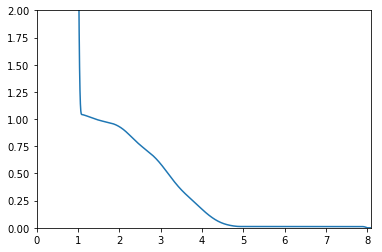

In [66]:
plt.plot(gromacs_potential_maker.r, gromacs_potential_maker.ur)
plt.xlim(0, 8.1)
plt.ylim(0, 2)
#plt.ylim(-2, 2)